In [1]:
%autosave 180

Autosaving every 180 seconds


In [2]:
# Numerical libraries
import numpy as np   

# Import Preprocessing library
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import Normalizer

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
from matplotlib import pyplot as plt
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns
sns.set(style="ticks")

In [3]:
headers= ["symboling",
          "normalized_losses",
          "make",
          "fuel_type",
          "aspiration",
          "num_of_doors",
          "body_style",
          "drive_wheels",
          "engine_location",
          "wheel_base",
          "length",
          "width",
          "height",
          "curb_weight",
          "engine_type",
          "num_of_cylinders",
          "engine_size",
          "fuel_system",
          "bore",
          "stroke",
          "compression_ratio",
          "horsepower",
          "peak_rpm",
          "city_mpg",
          "highway_mpg",
          "price"]

### 1. Load the file

In [4]:
# Read in the file and convert "?" to NaN
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header=None,names=headers,na_values="?")

In [5]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-

### 2. Problem Statement: 
In order to build a new car variant for a manufacturing unit, demonstrate a model to predict the price of the car based on the all the numeric and boolean attributes provided.

### 3. Browse a sample record from the dataframe for null values

In [7]:
# Get number of rows with missing ofr NA values
sum(df.isnull().any())

7

In [8]:
df[np.any(df[df.columns[2:]].isnull(), axis=1)]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


### There are 12 rows with null values, that require to be either dropped or transformed. We will transform as we have limited data. 

In [9]:
# Make a copy for transformation
df_1 = df.copy()

In [10]:
df_1.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [11]:
df_1.shape

(205, 26)

### 4.How many records are available in the data set and how many attributes. Do you think the depth (number of records) is sufficient given the breadth? In other words, is the sample likely to be a good representative of the universe?

The number of records is very less, with approx 5% missing data.  Hence this is not a good sample of the universe. 

# -------------------------------------------------------------------------

### Transform the missing values to meaningful data

Since, the usual num-of-doors doors is 4 - replacing null with 4

In [12]:
df_1['num_of_doors'] = df_1['num_of_doors'].fillna('four')

In [13]:
### Using mean imputation for the other vairables (numerical) with missing values.

In [14]:
#Defining the imputation strategy and creating an instance
imp = Imputer(missing_values="NaN", strategy="mean")

#Running a 'for' loop to impute the variables containing missing values
for i in df_1.columns:
    if df_1[i].isnull().sum() > 0:
        df_1[i] = imp.fit_transform(df_1[[i]])

In [15]:
df_1["normalized_losses"] = df_1["normalized_losses"].astype(np.float)
df_1["bore"] = df_1["bore"].astype(np.float)
df_1["stroke"] = df_1["stroke"].astype(np.float)
df_1["horsepower"] = df_1["horsepower"].astype(np.float)
df_1["peak_rpm"] = df_1["peak_rpm"].astype(np.float)

In [16]:
df_2 = df_1.copy()

In [17]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression_ratio    205 non-null float64
horsepower           205 non-

### Encoding categorical data (store in dataframe variable name - df_2)

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in ['make','fuel_type','aspiration', 'num_of_doors','body_style','drive_wheels','engine_location','engine_type','num_of_cylinders','fuel_system']:
    df_2[i] = labelencoder.fit_transform(df_2[i])
df_2.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# -------------------------------------------------------------------------

### 5. Analyse the data distribution for the various attributes and share your observations.  

### Plotting the data to visualize and analyse

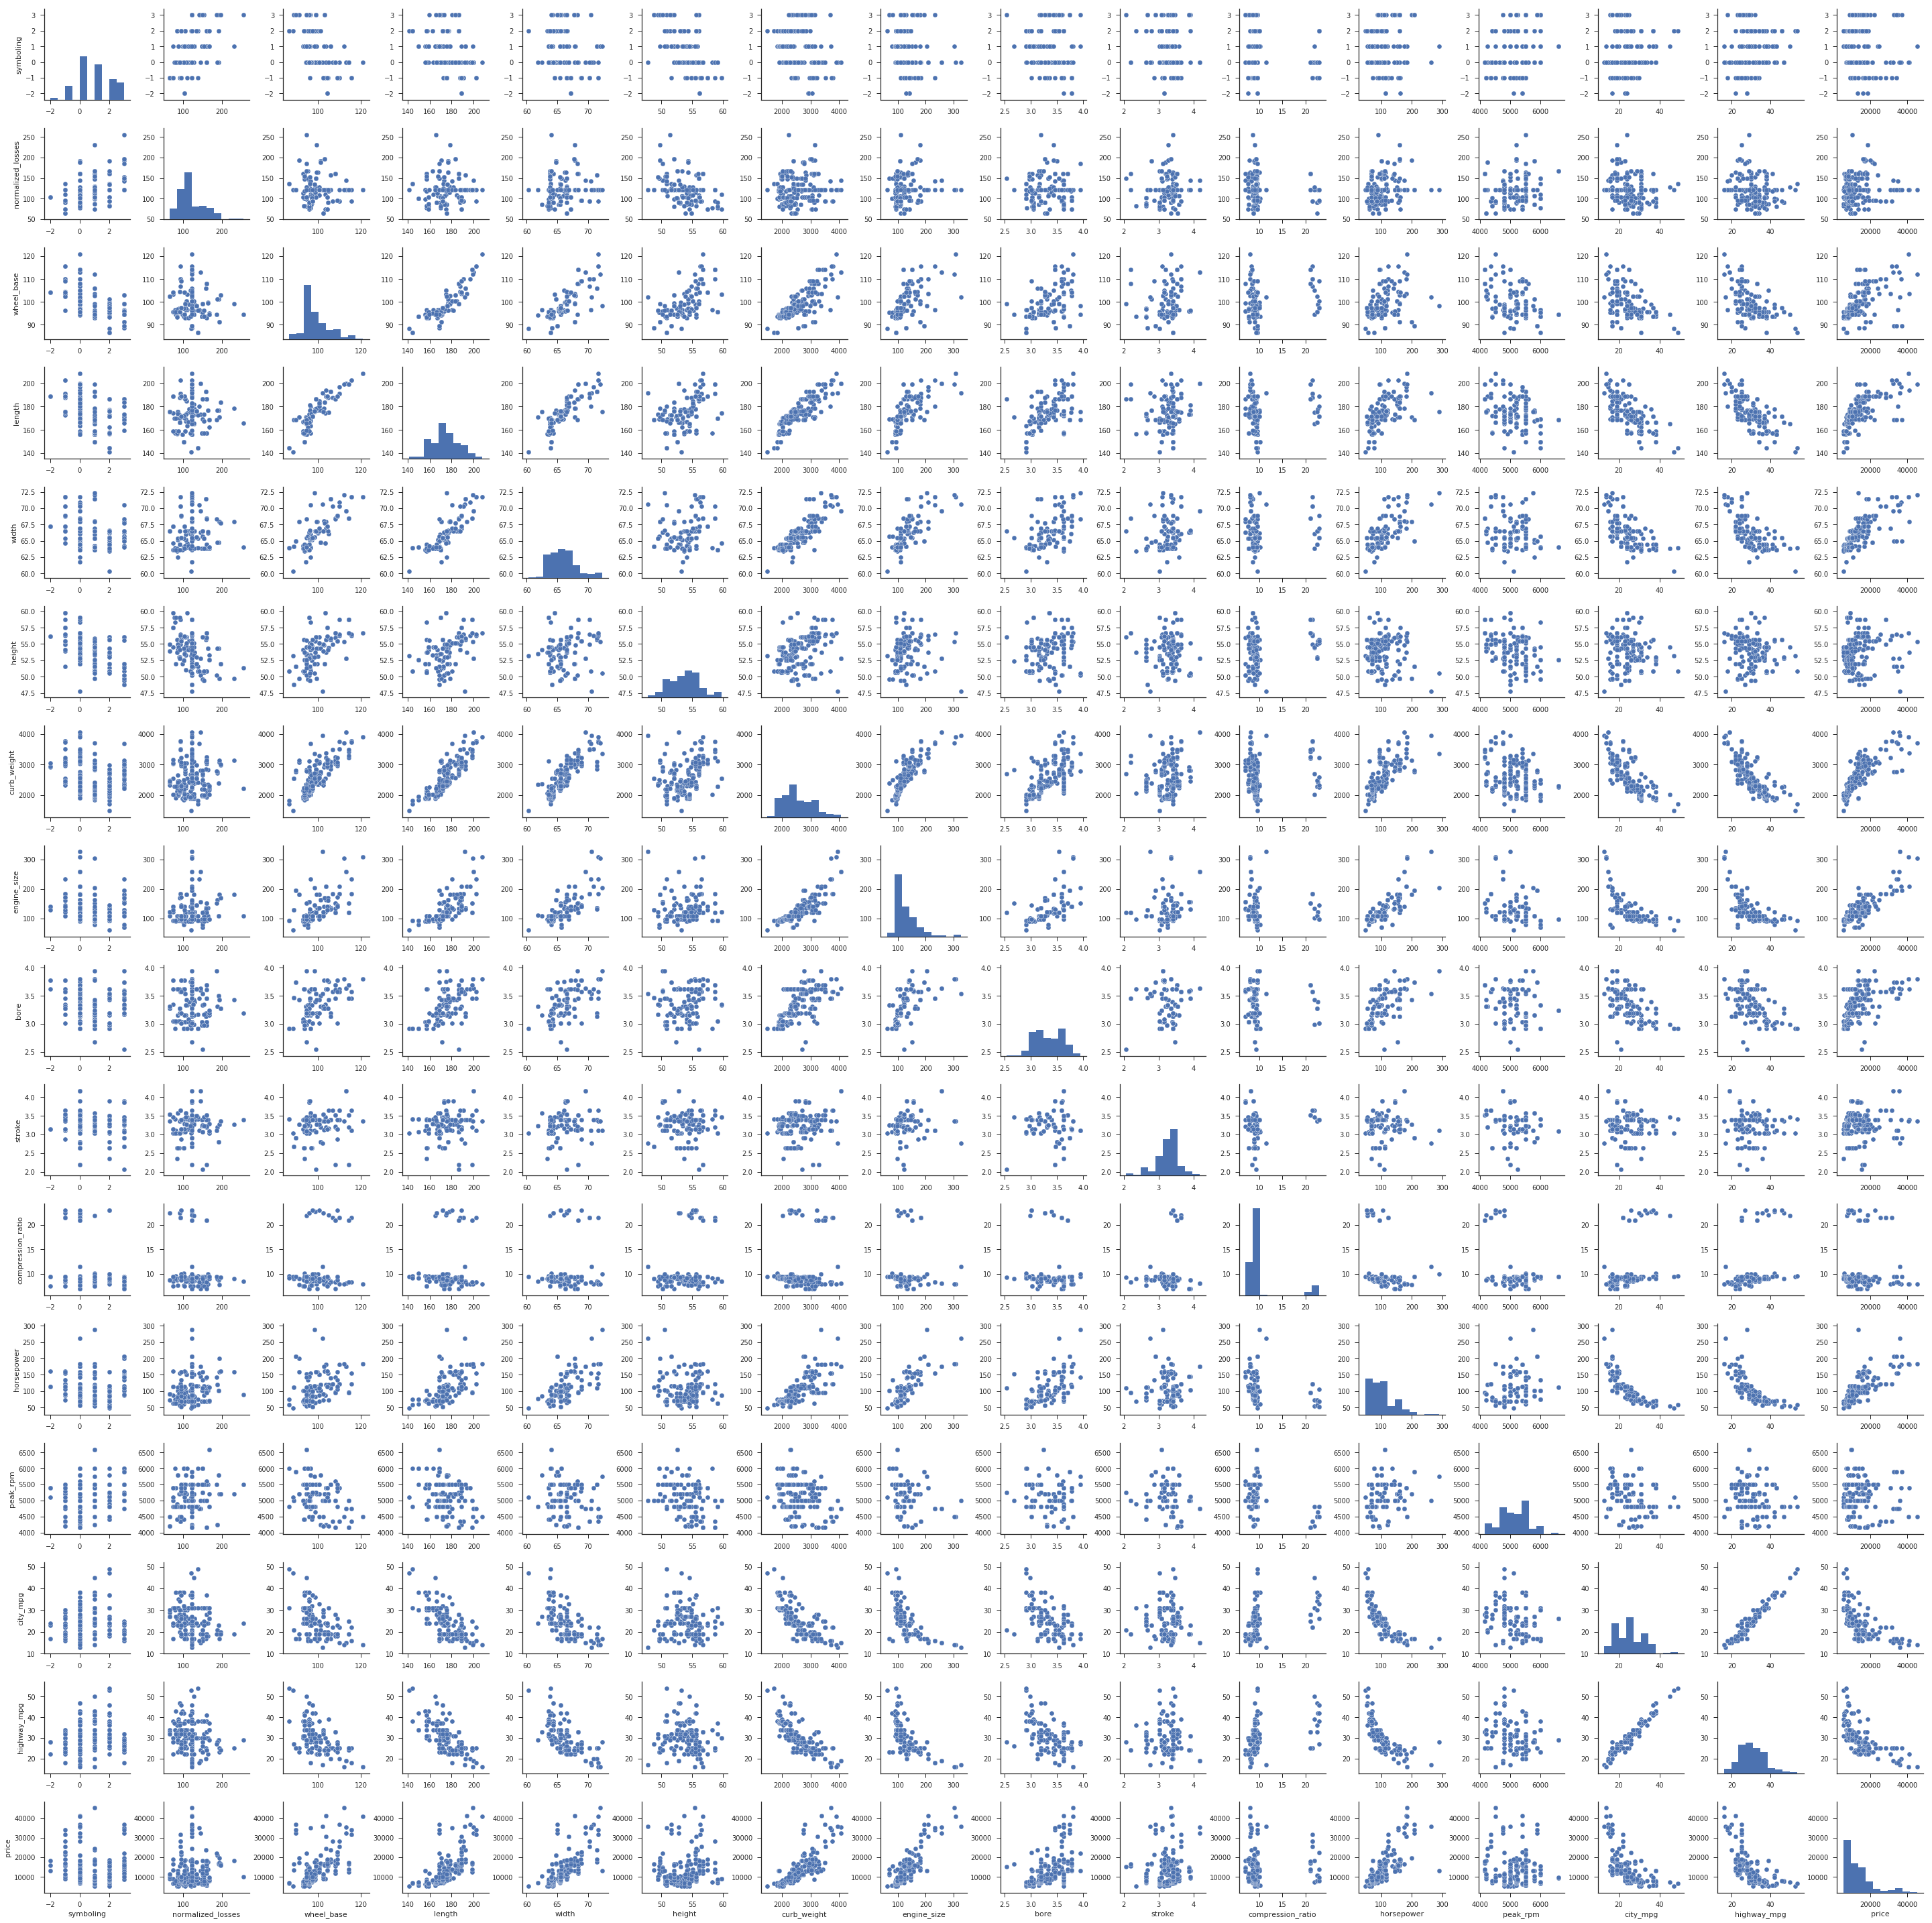

In [19]:
plt = sns.pairplot(df_1)

In [20]:
#Setting the plot parameters
from matplotlib import pyplot as plt
plt.rcParams.update({'axes.titlesize': 'large'})
plt.rcParams.update({'axes.labelsize': 'large'})

# Analyzing Categorical Data

/usr/local/anaconda/python2/lib/python2.7/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


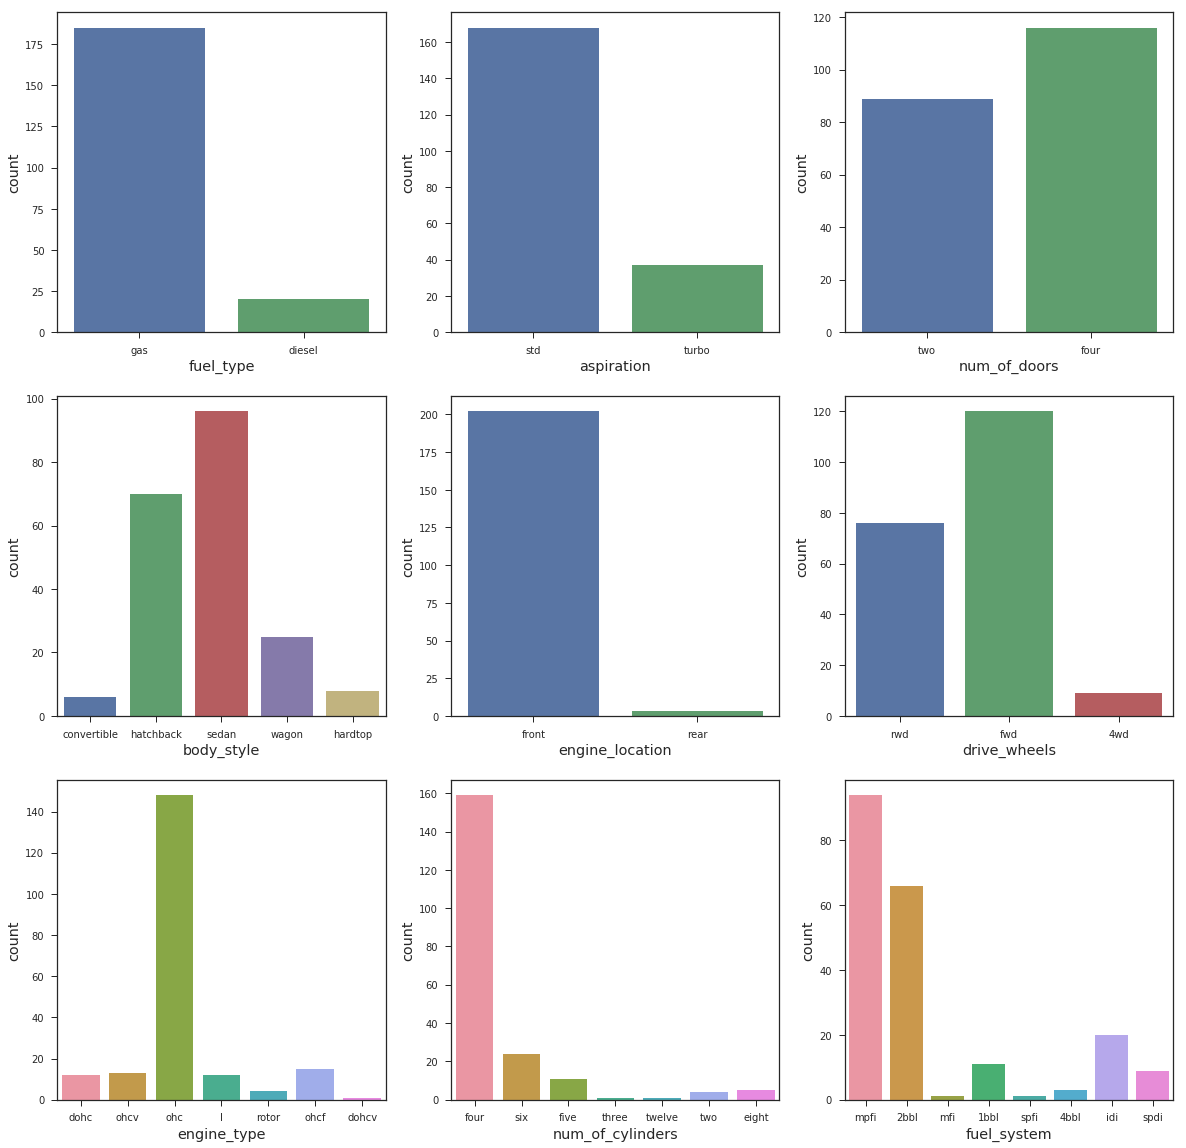

In [21]:
categorical_data = ['fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'engine_location',
               'drive_wheels', 'engine_type', 'num_of_cylinders', 'fuel_system']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

for cols, ax in zip(categorical_data[0:], axs.ravel()):
    sns.countplot(x=cols, data=df_1, ax=ax)

'Gas' is preferred by more than 80% of the customers than 'diesel'.

Even though there is not much difference, looks like 'four door vehicles' more popular as per the dataset. (Note: The null values were replaced with Four Doors, hence this may not be the correct inference.)

'Front Wheen Drive (fwd)' has the most number of cars followed by 'rear wheel drive (rwd)' and 'four wheel drive (4wd)'.

Std / Sedan cars are more preferred.

Front Engine, Four Cylinder with MPFI fuel system cars are manufactured/sold comparatively higher than the other options.

Text(0.5,0,u'Count')

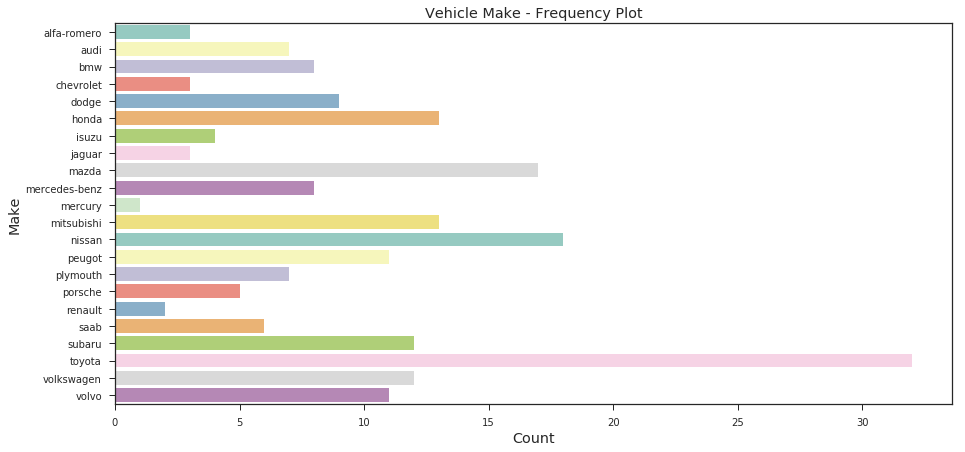

In [22]:
#Vehicle Make - Frequency Plot
f, axis = plt.subplots(figsize=(15, 7))
sns.countplot(y='make', data=df_1, palette="Set3")
plt.title("Vehicle Make - Frequency Plot")
plt.ylabel('Make')
plt.xlabel('Count')

Toyota manufacturer has most number of vehicles with more than 40% than the 2nd highest maker Nissan. Mazda comes in as the 3rd highest make.

# Symboling : Insurance Risk Rating - Histogram 

If it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.  Actuarians call this process "symboling".  A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.


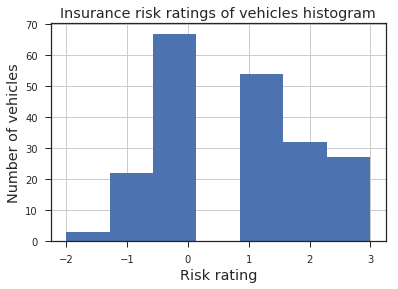

In [23]:
df.symboling.hist(bins=7)
plt.title("Insurance risk ratings of vehicles histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

Most number of vehicles in the range of ratings 0 and 1.

# Normalized Losses - Histogram

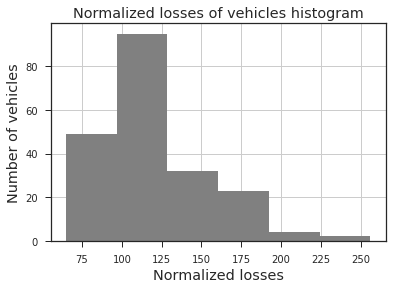

In [24]:
#Data Transformation using bins
df_1['normalized_losses'].hist(bins=6,color='grey')
plt.title("Normalized losses of vehicles histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses');

Normalized losses (the average loss payment per insured vehicle year) has more number of cars in the range of 65 and 150.

# Curb-Weight - Density Plot

Text(0.5,0,u'Curb Weight')

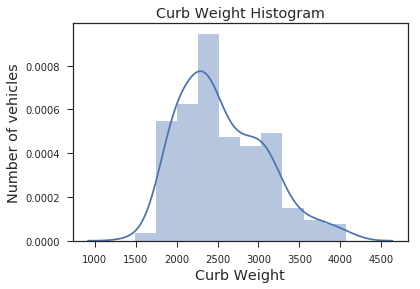

In [25]:
#Curb Weight - Density Plot
sns.distplot(df_1['curb_weight'])
plt.title("Curb Weight Histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb Weight')

Curb weight of the cars are distributed between 1500 and 4000 approx. The normal distibution in this case is slightly skewed to the right

# Horsepower - Histogram

Text(0.5,0,u'Horsepower')

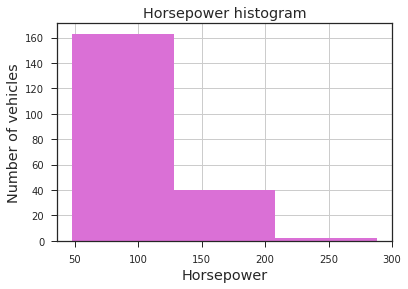

In [26]:
#Creating 3 bins
df_1['horsepower'].hist(bins=3,color='orchid')
plt.title("Horsepower histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horsepower')

With regarding to the horsepower, most vehicles are in between 50 and 125.

# From the above, the observation is that data is not normaly distributed, we can try to normalize the data for our prediction model

**Feature scaling** is a method used to standardize(normal distribution, f(0,1)) the range of independent variables or features of data. 

In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [27]:
from sklearn.preprocessing import Normalizer
nor = Normalizer()
df_3 = nor.fit_transform(df_2)

df_3 = pd.DataFrame(df_3 , columns  = headers)
df_3.head()
df_3 = pd.DataFrame(df_3 , columns  = headers)
df_3.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.000205,0.008346,0.000000,0.000068,0.0,0.000068,0.000000,0.000137,0.0,0.006061,...,0.008893,0.000342,0.000237,0.000183,0.000616,0.007593,0.342036,0.001437,0.001847,0.923156
1,0.000172,0.006999,0.000000,0.000057,0.0,0.000057,0.000000,0.000115,0.0,0.005083,...,0.007458,0.000287,0.000199,0.000154,0.000516,0.006368,0.286850,0.001205,0.001549,0.946604
2,0.000057,0.006982,0.000000,0.000057,0.0,0.000057,0.000114,0.000114,0.0,0.005408,...,0.008699,0.000286,0.000153,0.000199,0.000515,0.008813,0.286146,0.001087,0.001488,0.944280
3,0.000132,0.010804,0.000066,0.000066,0.0,0.000000,0.000198,0.000066,0.0,0.006575,...,0.007181,0.000329,0.000210,0.000224,0.000659,0.006720,0.362334,0.001581,0.001976,0.919010
4,0.000108,0.008857,0.000054,0.000054,0.0,0.000000,0.000162,0.000000,0.0,0.005368,...,0.007345,0.000270,0.000172,0.000184,0.000432,0.006211,0.297043,0.000972,0.001188,0.942438


# Correlation Analysis

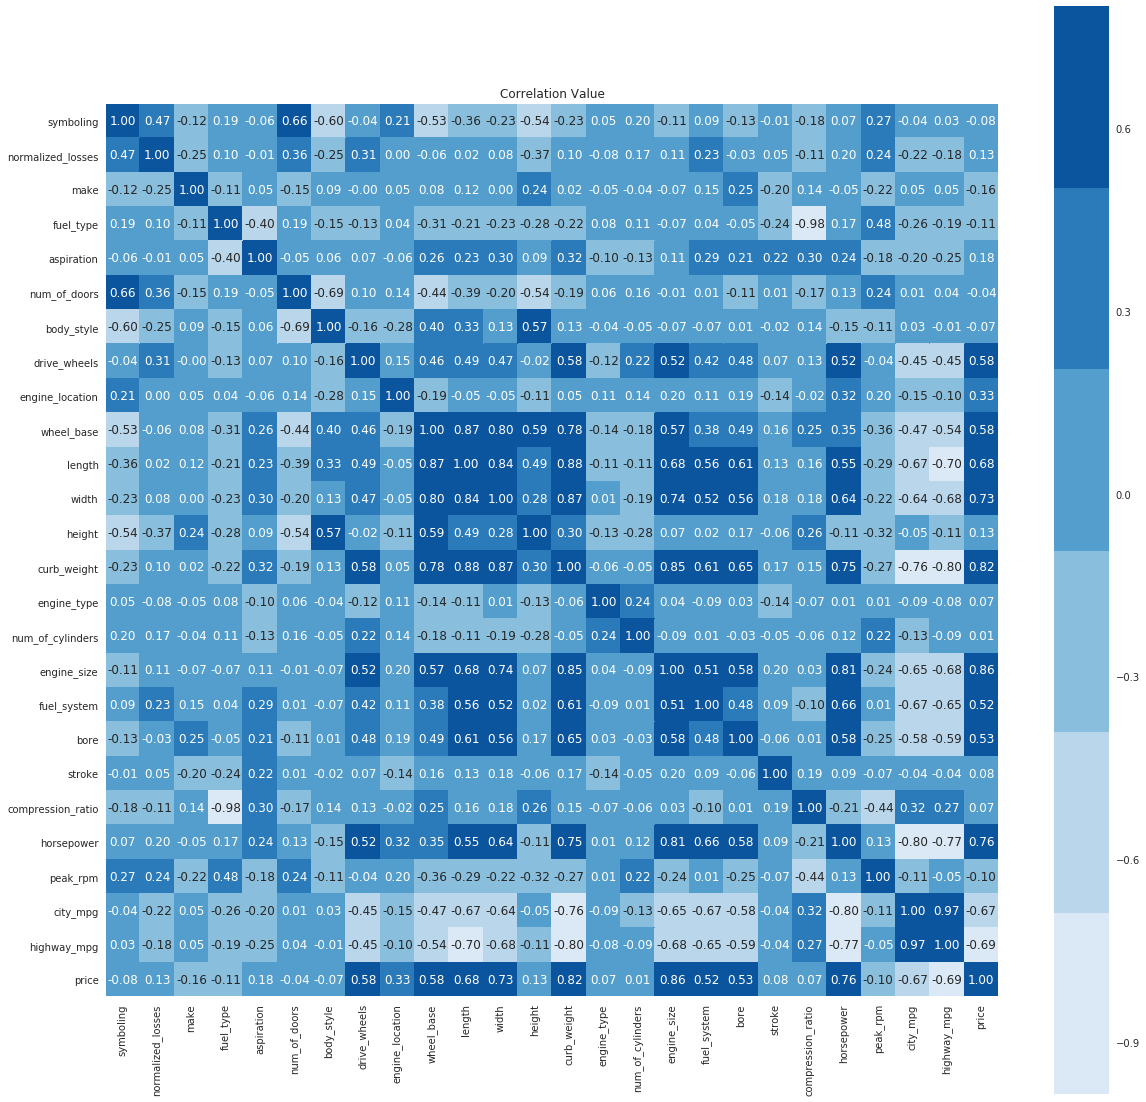

In [28]:
from matplotlib.colors import ListedColormap
import seaborn as sns; sns.set()
plt.figure(figsize=(20,20))
# my_cmap = sns.light_palette("Violet", as_cmap=True)
# my_cmap = ListedColormap(sns.husl_palette(7))
my_cmap = ListedColormap(sns.mpl_palette("Blues"))
ax = sns.heatmap(df_2.corr(), vmax=.8, fmt='.2f', annot=True, square=True, cmap=my_cmap)
plt.title('Correlation Value')
plt.show()

# 6. Independent attributes which have |R| close to 1?

From the heat map above, we can infer :

highway-mpg is highly correlated with city-mpg with a correlation coefficient of 0.97. 
Since, these two variables are providing the same information for the model prediction, we can drop either one of these variables.

curb-weight has a high correlation with engine-size, length, width and wheel-base which is expected as these adds up to the weight of the car.

Since, wheel-base of a car is determined by its length and weight, we can see the high correlation between these variables.

There is also a high correlation between engine-size and horsepower

# 7.Attributes that seem to have strong relation with dependent variable (Price of the car)

In [29]:
corr_matrix = df_2.corr()
corr_matrix["price"].sort_values(ascending=False)

price                1.000000
engine_size          0.861752
curb_weight          0.820825
horsepower           0.757917
width                0.728699
length               0.682986
wheel_base           0.583168
drive_wheels         0.576866
bore                 0.532300
fuel_system          0.516533
engine_location      0.331013
aspiration           0.177285
height               0.134388
normalized_losses    0.133999
stroke               0.082095
engine_type          0.071535
compression_ratio    0.070990
num_of_cylinders     0.005384
num_of_doors        -0.041945
body_style          -0.072677
symboling           -0.082201
peak_rpm            -0.100854
fuel_type           -0.110207
make                -0.161471
city_mpg            -0.667449
highway_mpg         -0.690526
Name: price, dtype: float64

The dependent variable PRICE has a stronger correlation with the following attributes: 
- engine-size
- curb-weight
- horsepower
- city-mpg/highway-mpg
- length/width

Hence, these will be the major predictors for price in our model.


In [30]:
# df_cov = df_2.drop('symboling', axis =1)
df_cov = df_2.copy()
df_cov.head()

#drop external factors not affecting the manufacturing price
df_cov1 = df_cov.drop(columns=['symboling','normalized_losses'])
                     
# drop one of the independent variables with R~1
x_cov = df_cov1.drop(columns=['city_mpg', 'width','wheel_base','horsepower','city_mpg','width']).head()

Text(0.5,1,u'Price Vs Engine Size')

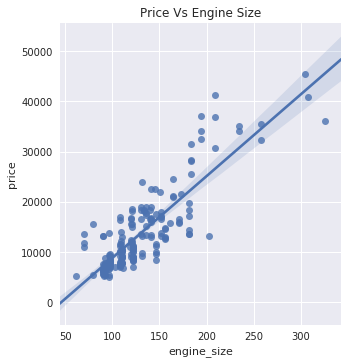

In [31]:
sns.lmplot(x= 'engine_size' , y='price', data=df_1)
plt.title("Price Vs Engine Size")

The above plot confirms higher the engine-size is, impacts the cost of the vehicle linearly.

Text(0.5,1,u'Price Vs Length')

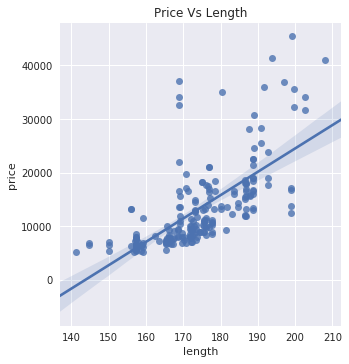

In [32]:
sns.lmplot(x= 'length' , y='price', data=df_1)
plt.title("Price Vs Length")

Text(0.5,1,u'Price Vs Curb Weight')

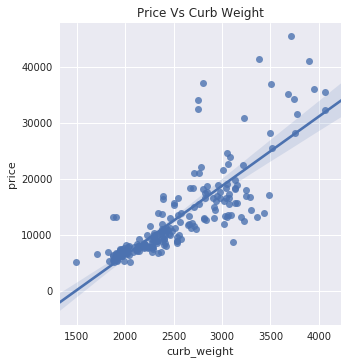

In [33]:
sns.lmplot(x= 'curb_weight' , y='price', data=df_1)
plt.title("Price Vs Curb Weight")

Text(0.5,1,u'Price Vs Horsepower')

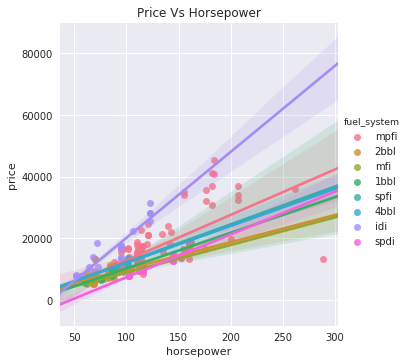

In [34]:
sns.lmplot(x= 'horsepower' , y='price', hue='fuel_system',data=df_1)
plt.title("Price Vs Horsepower")

Text(0.5,1,u'Price Vs Highway MPG')

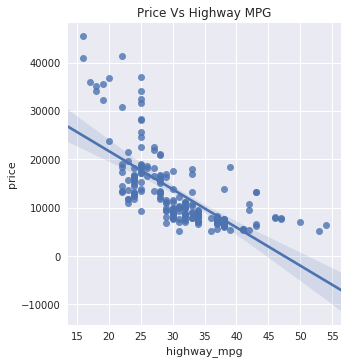

In [35]:
sns.lmplot(x= 'highway_mpg' , y='price', data=df_1)
plt.title("Price Vs Highway MPG")

Text(0.5,1,u'Curb Weight Vs Highway MPG')

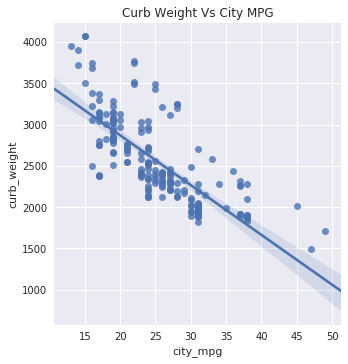

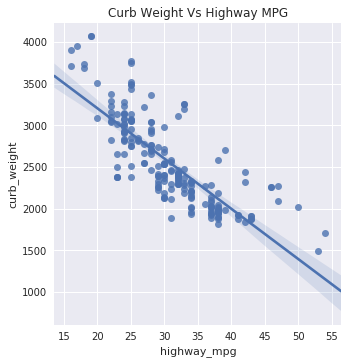

In [36]:
#Scatter plot - Curb-weight Vs City-mpg
sns.lmplot('city_mpg',"curb_weight", df_1)
plt.title("Curb Weight Vs City MPG")

#Scatter plot - Curb-weight Vs Highway-mpg
sns.lmplot('highway_mpg',"curb_weight", df_1)
plt.title("Curb Weight Vs Highway MPG")

It is evident from the above plots that, 'city-mpg' and 'highway-mpg' have a negative correlation with the 'curb weight'. 

It can be said that, heavier vehicles give less mileage in both city and highway.

# --------------------------------------------------------------------

# Price and Make Relationship - Box plot

/usr/local/anaconda/python2/lib/python2.7/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5,1,u'Boxplot of Price and Make')

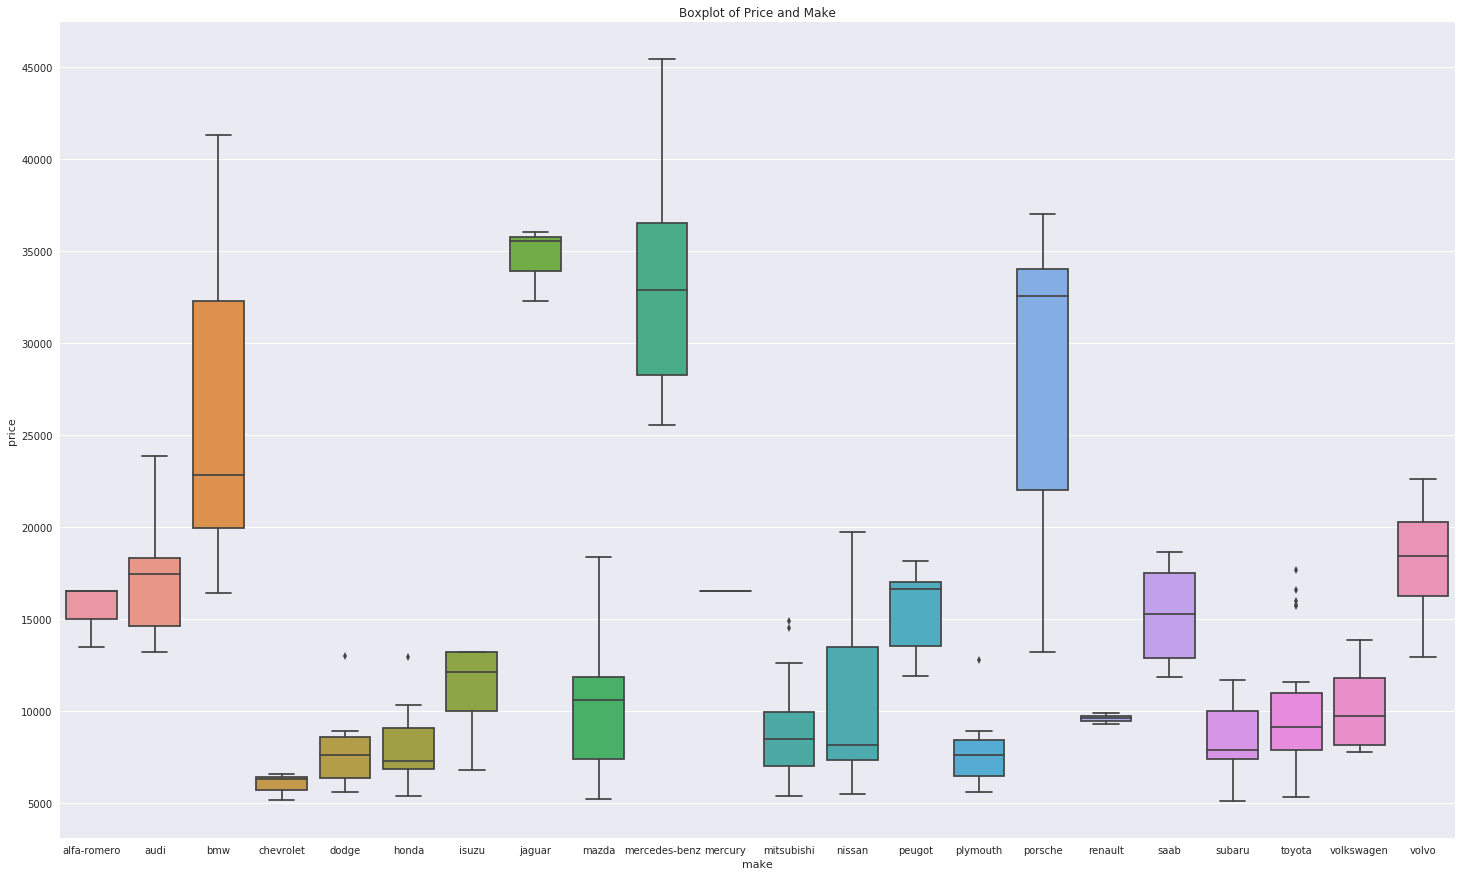

In [37]:
#Box-plot of Price and Make
plt.rcParams['figure.figsize']=(25,15)
ax = sns.boxplot(x="make", y="price", data=df_1)
plt.title("Boxplot of Price and Make")

The most expensive car is manufactured by Mercedes-Benz

The least expensive car is manufacture by Chevrolet

BMW, Jaguar, Porsche and Mercedes-Benz are the manufaturers who make only premium cars in the high price range of above 20000.

Chevrolet, Dodge, Honda, Mitsubishi, Plymoth and Subaru who make affordable cars in the price range of less than 10000.

# -------------------------------------------------------------------------

# Spliting the dataset into Training and Test

##### Linear Regrssion on the non-normalized data

In [38]:
import sklearn
from sklearn.model_selection import train_test_split

x:  (205, 25)
y:  (205,)
x_test:  (52, 25)
y_test:  (52,)
Train Score:  0.9105339467622046
Test Score:  0.725222470664006


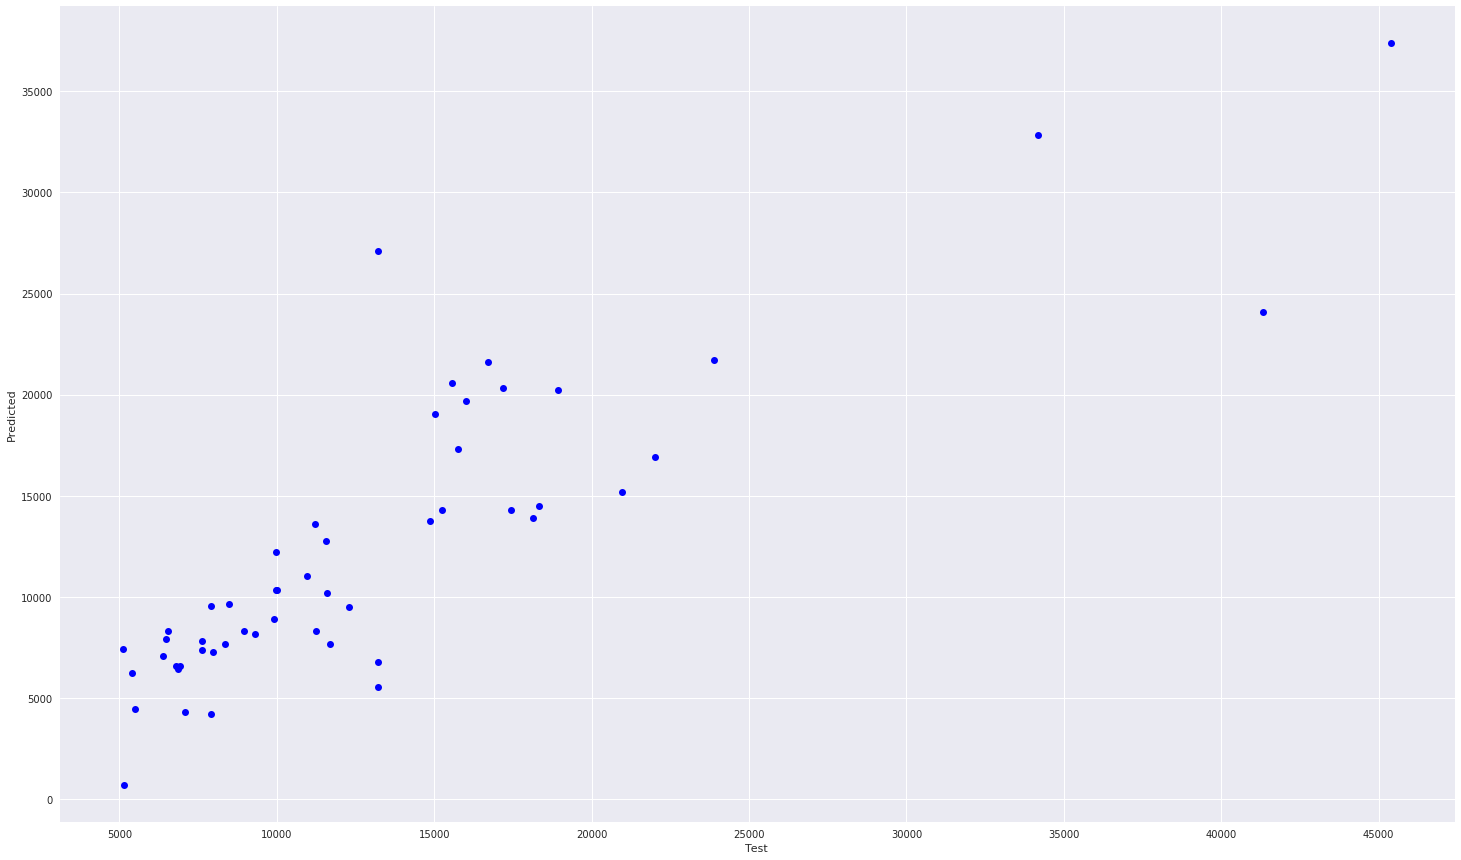

In [39]:
# Lets use 75% of data for training and 25% for testing on non-normalized data
y = df_2['price']
x = df_2.drop('price',axis =1)
train_per = 0.75
test_per = 0.25

print ('x: '),x.shape
print ('y: '),y.shape
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y,train_size=train_per, test_size=test_per, random_state=0)
print ('x_test: '),x_test.shape
print ('y_test: '),y_test.shape
# Fitting Multiple Linear Regression to the Training set
reg = LinearRegression()
lm = reg.fit(x_train, y_train)
print 'Train Score: ' , lm.score(x_train,y_train)
print 'Test Score: ', lm.score(x_test,y_test)
y_pred = lm.predict(x_test) 
plt.plot(y_test, y_pred, 'bo')
plt.ylabel('Predicted')
plt.xlabel('Test')
plt.show()

There is considerable difference in the Train and Test Score, the graph above visualizes this discrepancy and outliers.

This is not a good model.

In [40]:
##### Linear Regrssion on the normalized data

xn:  (205, 25)
yn:  (205,)
xn_test:  (52, 25)
yn_test:  (52,)
Train Score:  0.9844425927235867
Test Score:  0.9615976100855704


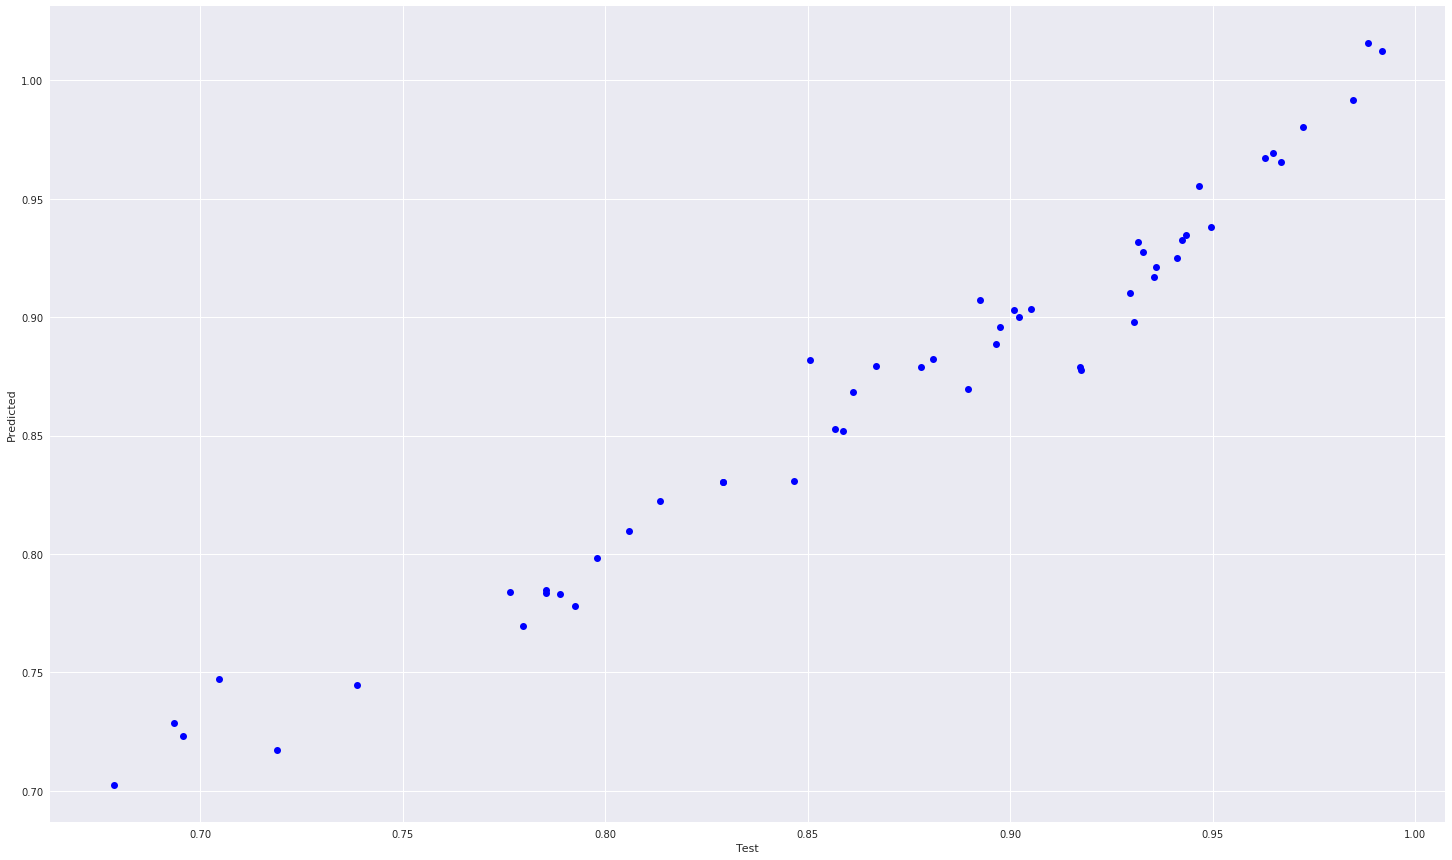

In [41]:
# Lets use 75% of data for training and 25% for testing on normalized data
yn = df_3['price']
xn = df_3.drop('price',axis =1)
train_per = 0.75
test_per = 0.25


print ('xn: '),x.shape
print ('yn: '),y.shape
xn_train, xn_test, yn_train, yn_test = sklearn.model_selection.train_test_split(xn, yn,train_size=train_per, test_size=test_per, random_state=0)
print ('xn_test: '),x_test.shape
print ('yn_test: '),y_test.shape
# Fitting Multiple Linear Regression to the Training set
reg = LinearRegression()
lm = reg.fit(xn_train, yn_train)
print 'Train Score: ' , lm.score(xn_train,yn_train)
print 'Test Score: ', lm.score(xn_test,yn_test)
yn_pred = lm.predict(xn_test) 
plt.plot(yn_test, yn_pred, 'bo')
plt.ylabel('Predicted')
plt.xlabel('Test')
plt.show()

** The normalized data gave a better linear relationship of the attributes**

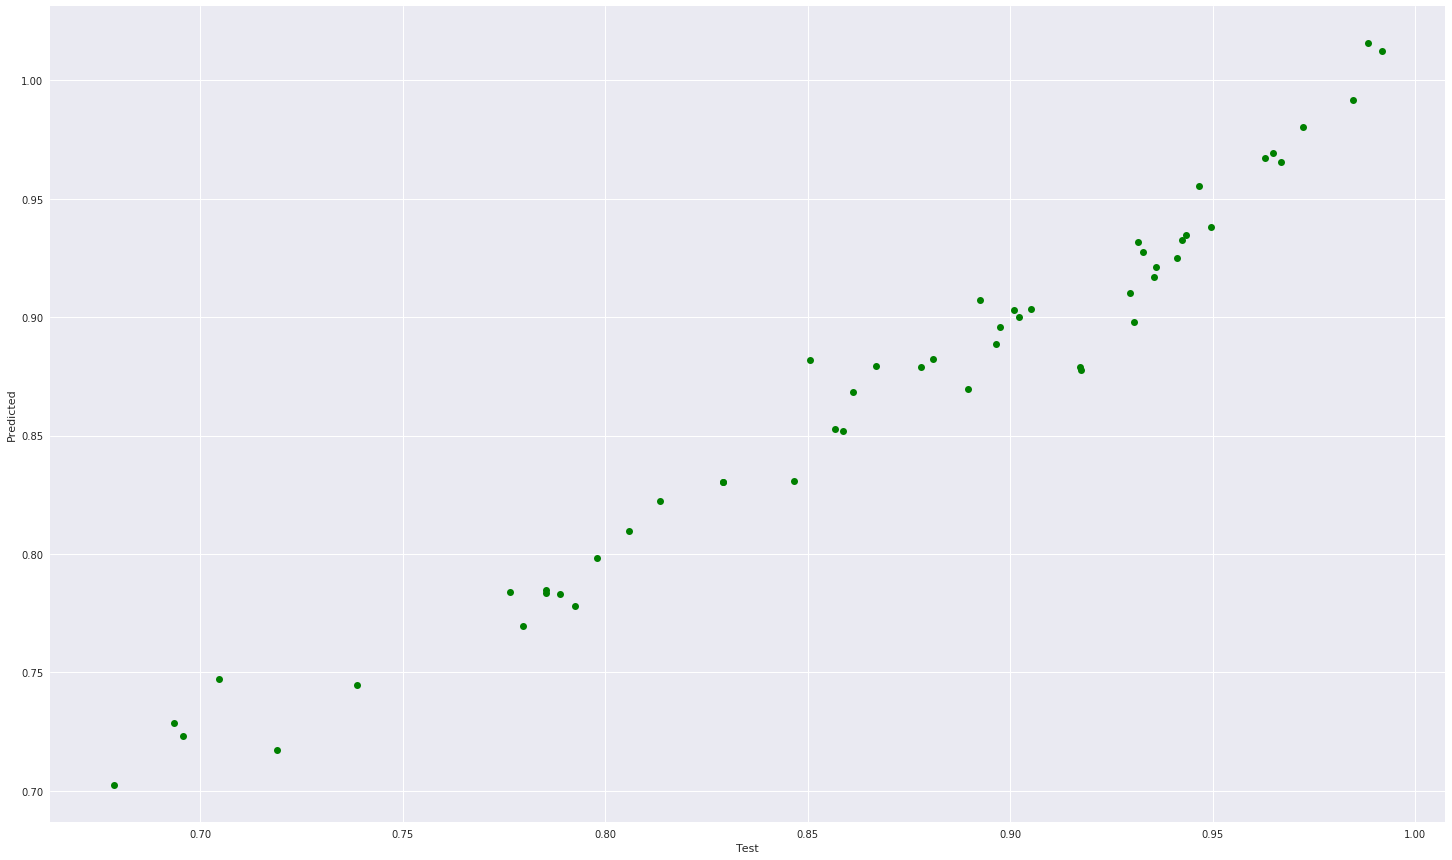

In [42]:
yn_pred = lm.predict(xn_test) 
plt.plot(yn_test, yn_pred, 'go')
plt.ylabel('Predicted')
plt.xlabel('Test')
plt.show()

## Leave one out cross validation (LOOCV)
**The goal of cross validation is to get a generalized score of your model. The reason for this generalization is to, hopefully, improve the model’s effectiveness in predicting on future data inputs.**

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut  
from sklearn import metrics

Xr = df_3.drop('price',axis =1)
yr = df_3['price']
X_array = np.array(Xr) #r stands for 'regression'
y_array = np.array(yr)

In [44]:
loo = LeaveOneOut()
ytests = []
ypreds = []
for train_idx, test_idx in loo.split(Xr):
    X_train, X_test = X_array[train_idx], X_array[test_idx] #requires arrays
    y_train, y_test = y_array[train_idx], y_array[test_idx]
    
    model = LinearRegression()
    model.fit(X = X_train, y = y_train) 
    y_pred = model.predict(X_test)
        
    # there is only one y-test and y-pred per iteration over the loo.split, 
    # so to get a proper graph, we append them to respective lists.
        
    ytests += list(y_test)
    ypreds += list(y_pred)
        
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("Leave One Out Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))

Leave One Out Cross Validation
R^2: 97.17420%, MSE: 0.00018


# ------------------------------------------------------------------

# Model Creation to predict the Price of a New Automobile

Using OLS, we will create a formula based on the attributes with high covariance with Price.

The Least squares method says that we are to choose these constants so that for every example point in our training data we minimize the sum of the squared differences between the actual dependent variable and our predicted value for the dependent variable. 

Based on the R^2 we will chose our model, and fine tune the model by dropping the attributes with a p-value greater than 0.05.

##### First we create a model with all the attributes and dropping one of the independent variables with high  covariance to avoid the problem of multicollinearity. 

Chosing the attribute based on the covariance with price

In [45]:
import statsmodels.formula.api as smf

In [46]:
model_ols = smf.ols(formula= 'price ~ symboling+normalized_losses+make+aspiration+num_of_doors+body_style+drive_wheels+horsepower+engine_location+wheel_base+height+curb_weight+engine_type+num_of_cylinders+engine_size+fuel_system+bore+stroke+compression_ratio+peak_rpm' , data =df_3).fit()
print ('The R^2 for the above model is: '), (model_ols.rsquared_adj)*100
print ('With an MSE of: '),model_ols.mse_total

The R^2 for the above model is:  97.41987485228773
With an MSE of:  0.006382363231031922


We must check the p-values, and drop p-value greater than 0.05 to get a confidence level of 95% for our model.

In [47]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     386.1
Date:                Thu, 09 Aug 2018   Prob (F-statistic):          9.48e-139
Time:                        06:26:03   Log-Likelihood:                 613.13
No. Observations:                 205   AIC:                            -1184.
Df Residuals:                     184   BIC:                            -1114.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.0838      0.006    176.874      0.000       1.072       1.096
symboling            -1.4731     15.875     -0.093      0.926     -32.794      29.848
normalized_losses     0.7731      0.485      1.593      0.113      -0.185       1.731
make                  0.9004      2.319      0.388      0.698      -3.674       5.475
aspiration         -181.6240     46.417     -3.913      0.000    -273.201     -90.047
num_of_doors        -83.4756     32.623     -2.559      0.011    -147.840     -19.112
body_style            2.1109     20.963      0.101      0.920     -39.247      43.469
drive_wheels        -42.1721     33.310     -1.266      0.207    -107.890      23.546
horsepower            4.5236      1.193      3.791      0.000       2.170       6.878
engine_location    -500.6098    292.164     -1.713      0.088   -1077.032      75.813
wheel_base          -11.1887      4.802     -2.330      0.021     -20.663      -1.714
height                1.4989      6.702      0.224      0.823     -11.723      14.721
curb_weight           0.1843      0.078      2.352      0.020       0.030       0.339
engine_type           6.6937     16.430      0.407      0.684     -25.721      39.108
num_of_cylinders    -17.9191     24.262     -0.739      0.461     -65.788      29.949
engine_size          -8.6211      1.450     -5.946      0.000     -11.482      -5.760
fuel_system          34.6489      8.526      4.064      0.000      17.828      51.470
bore                264.0894     67.934      3.887      0.000     130.060     398.119
stroke              211.2278     48.539      4.352      0.000     115.463     306.992
compression_ratio     3.4434      3.817      0.902      0.368      -4.086      10.973
peak_rpm             -0.6119      0.036    -16.834      0.000      -0.684      -0.540
==============================================================================
Omnibus:                        5.732   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.448
Skew:                          -0.334   Prob(JB):                       0.0656
Kurtosis:                       3.436   Cond. No.                     3.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### From the above we infer that there are attributes with a p-value greater than 0.05 that should be removed from the model, to have a 95% confidence level for our model.

In [48]:
model = smf.ols(formula= 'price ~ aspiration+num_of_doors+wheel_base+curb_weight+engine_size+fuel_system+bore+stroke+peak_rpm' , data =df_3).fit()
print ('The R^2 for the above model is:'), model.rsquared_adj
print ('The MSE is:'), model.mse_total

The R^2 for the above model is: 0.9730333499125347
The MSE is: 0.006382363231031922


# -------------------------------------------------------------------

# 8. Given the above analysis, which algorithm is likely to give a better accuracy? 

- To answer the questions like what should be the predicted? - Linear Regression is best suited.
- To answer the questions related to the probability? - Logistic Regression is best suited.

In our problem statement, we are trying to predict the Price of a new automobile model.

Hence **linear regression** is best suited. For a good prediction, we shall use the **OLS model, upon the normalized dataframe**


In [49]:
y_pred =  model.predict(xn) # predict out of sample
print(y_pred[:5])

0    0.917331
1    0.943349
2    0.931158
3    0.906104
4    0.937295
dtype: float64


In [50]:
model.params

Intercept         1.078586
aspiration     -100.670906
num_of_doors    -79.889115
wheel_base      -15.510536
curb_weight       0.280633
engine_size      -5.215766
fuel_system      46.402456
bore            278.972803
stroke          165.363371
peak_rpm         -0.516675
dtype: float64